<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/groupassignment2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# 请确保 train.csv 和 test.csv 文件已上传到 Colab 的工作目录
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 显示数据的基本信息
print("Train DataFrame Shape:", train_df.shape)
print("Test DataFrame Shape:", test_df.shape)
print("\nTrain DataFrame Head:")
print(train_df.head())
print("\nTrain DataFrame Info:")
print(train_df.info())


Train DataFrame Shape: (64000, 35)
Test DataFrame Shape: (16000, 36)

Train DataFrame Head:
  tappingsteelgrade   force_meas     speed  entrytemperature  \
0          GL4G71R1  58204143.19  2.634871       1000.661121   
1          GL4G71R1  53211949.94  3.947747       1020.846126   
2          JV7P1BP6  43513598.87  1.573130        829.078290   
3          JT5P31P2  33293124.30  2.979649        736.655045   
4          JT5P32P1  68174217.63  3.401038        893.722030   

   entrytemperaturebot  entrytemperaturecore  entrytemperaturetop  \
0           939.942163           1034.327117           916.847574   
1           991.621746           1044.907925           975.227384   
2           786.696648            857.833946           763.533963   
3           734.483511            738.987016           730.511453   
4           867.859688            913.164933           850.840106   

   entrythickness  entrywidth  exitthickness  ...  pctni    pcto    pctp  \
0        0.080232    3.496171   

Missing values in train dataset:
 tappingsteelgrade       0
force_meas              0
speed                   0
entrytemperature        0
entrytemperaturebot     0
entrytemperaturecore    0
entrytemperaturetop     0
entrythickness          0
entrywidth              0
exitthickness           0
zeropoint               0
radius                  0
pctal                   0
pctb                    0
pctc                    0
pctca                   0
pctco                   0
pctcr                   0
pctcu                   0
pcth                    0
pctmg                   0
pctmn                   0
pctmo                   0
pctn                    0
pctnb                   0
pctni                   0
pcto                    0
pctp                    0
pcts                    0
pctsi                   0
pctsn                   0
pctti                   0
pctv                    0
pctzr                   0
fur_line_no             0
dtype: int64

Unique tappingsteelgrade values:
 ['GL4G71

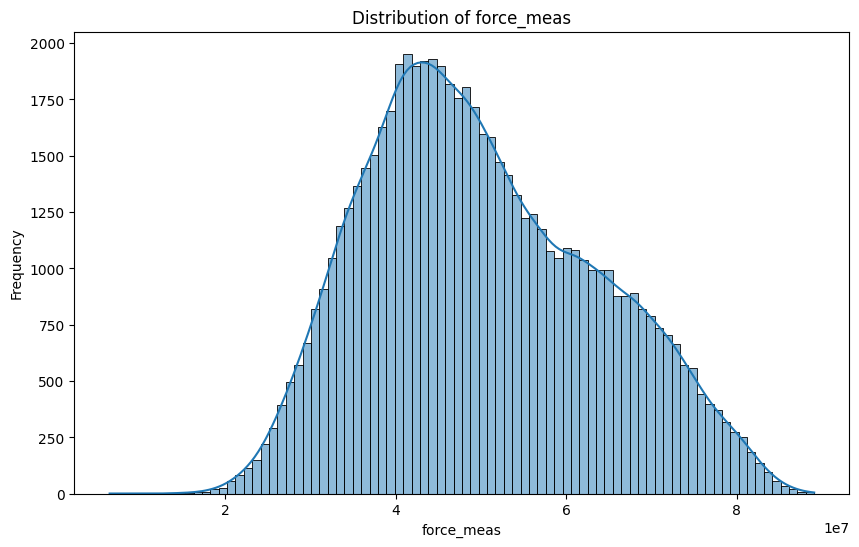

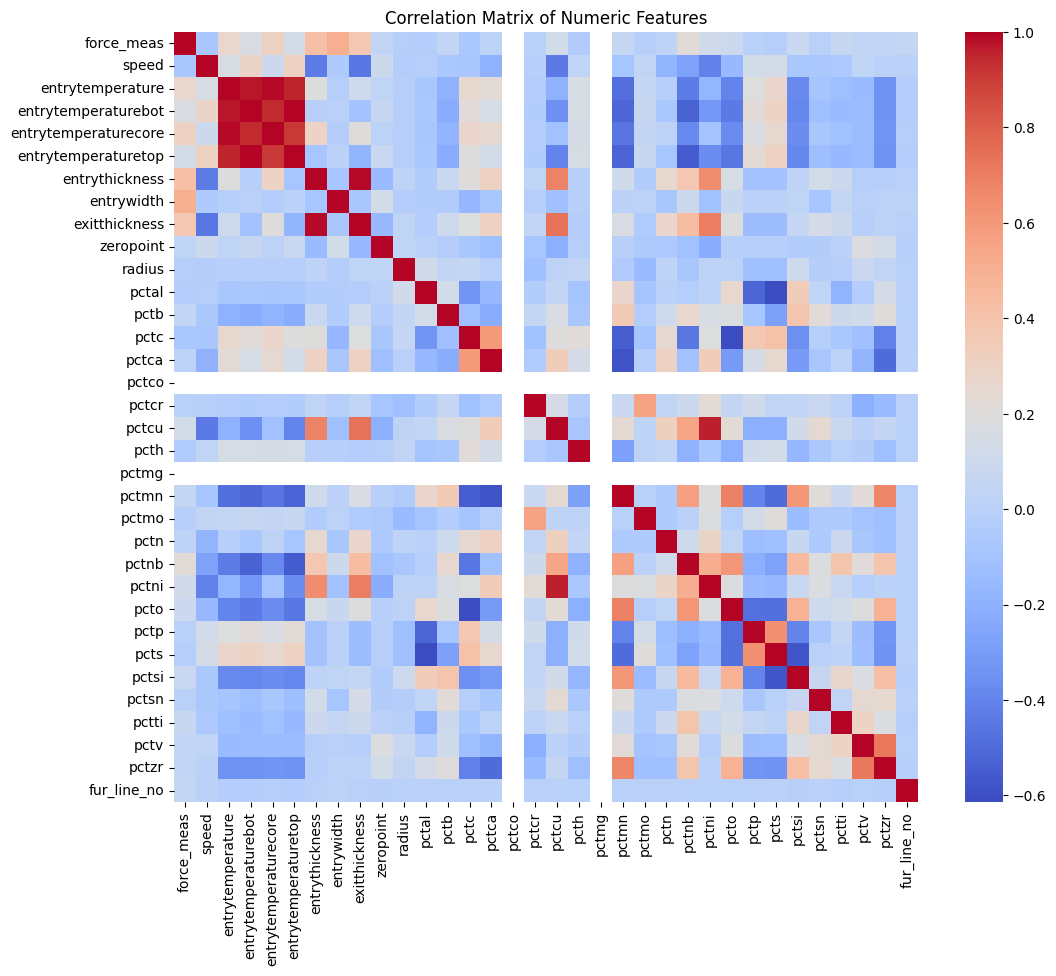

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 检查缺失值
print("Missing values in train dataset:\n", train_df.isnull().sum())

# 2. 查看 tappingsteelgrade 的唯一值
print("\nUnique tappingsteelgrade values:\n", train_df['tappingsteelgrade'].unique())

# 3. 绘制 force_meas 的分布图
plt.figure(figsize=(10,6))
sns.histplot(train_df['force_meas'], kde=True)
plt.title("Distribution of force_meas")
plt.xlabel("force_meas")
plt.ylabel("Frequency")
plt.show()

# 4. 生成相关性热力图（排除类别变量）
plt.figure(figsize=(12,10))
corr_matrix = train_df.drop(columns=['tappingsteelgrade']).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


Correlation of features with force_meas (absolute values):

force_meas              1.000000
entrywidth              0.502106
entrythickness          0.423319
exitthickness           0.370011
entrytemperaturecore    0.302364
entrytemperature        0.261191
pctnb                   0.219927
entrytemperaturebot     0.167374
entrytemperaturetop     0.136062
pctcu                   0.129380
pctni                   0.119226
pcto                    0.092105
speed                   0.083172
pctsi                   0.079338
pctti                   0.073087
pctc                    0.065620
pctmn                   0.058954
fur_line_no             0.056404
pctzr                   0.045958
pctb                    0.045037
pcth                    0.044644
pctv                    0.042922
zeropoint               0.030937
pctn                    0.027030
pctal                   0.021428
pcts                    0.018816
radius                  0.017413
pctca                   0.013762
pctmo           

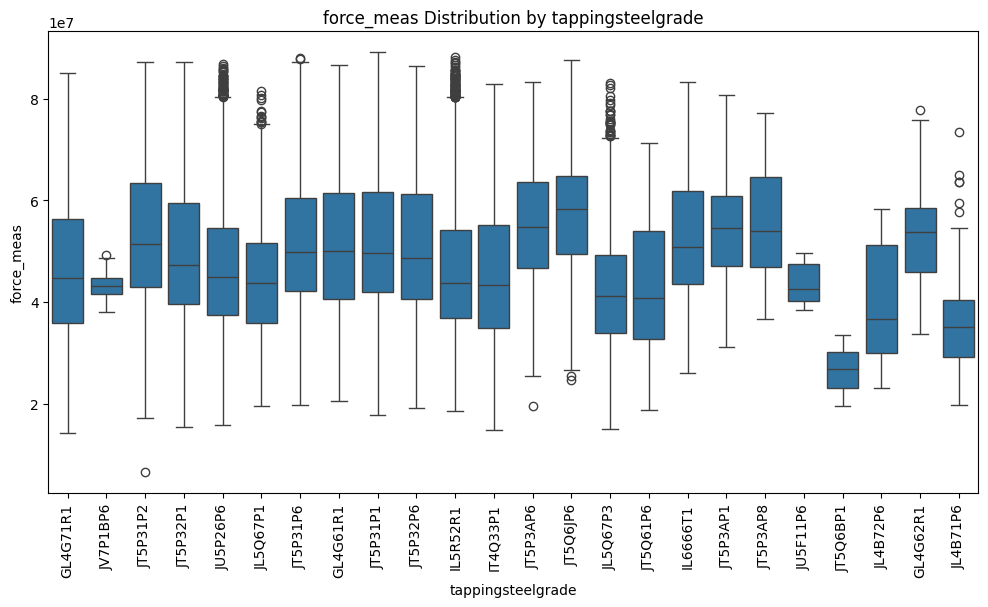

In [11]:
import numpy as np

# 1. 计算与 force_meas 的相关系数绝对值，并排序
corr_matrix = train_df.drop(columns=['tappingsteelgrade']).corr()
corr_with_force = corr_matrix['force_meas'].abs().sort_values(ascending=False)

print("Correlation of features with force_meas (absolute values):\n")
print(corr_with_force)

# 2. 分析各 tappingsteelgrade 对应的 force_meas 分布（箱型图）
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='tappingsteelgrade', y='force_meas', data=train_df)
plt.xticks(rotation=90)
plt.title('force_meas Distribution by tappingsteelgrade')
plt.show()


In [12]:
# 查看 pctco 和 pctmg 的取值分布
print("pctco describe:\n", train_df['pctco'].describe())
print("\npctco value counts:\n", train_df['pctco'].value_counts())

print("\npctmg describe:\n", train_df['pctmg'].describe())
print("\npctmg value counts:\n", train_df['pctmg'].value_counts())


pctco describe:
 count    64000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: pctco, dtype: float64

pctco value counts:
 pctco
0    64000
Name: count, dtype: int64

pctmg describe:
 count    64000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: pctmg, dtype: float64

pctmg value counts:
 pctmg
0    64000
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 删除常量列
train_df = train_df.drop(columns=['pctco', 'pctmg'])
test_df = test_df.drop(columns=['pctco', 'pctmg'], errors='ignore')  # 如果 test.csv 中也有这两列

# 2. 对类别变量 tappingsteelgrade 进行 One-Hot 编码
train_df_encoded = pd.get_dummies(train_df, columns=['tappingsteelgrade'], drop_first=True)
test_df_encoded = pd.get_dummies(test_df, columns=['tappingsteelgrade'], drop_first=True)

# 保证 test_df_encoded 和 train_df_encoded 的列一致（去除 test 中可能缺失的列）
missing_cols = set(train_df_encoded.columns) - set(test_df_encoded.columns)
for col in missing_cols:
    if col != 'force_meas':  # test_df 不包含目标变量
        test_df_encoded[col] = 0

test_df_encoded = test_df_encoded[train_df_encoded.drop(columns=['force_meas']).columns]

# 3. 分离特征和目标变量
X = train_df_encoded.drop(columns=['force_meas'])
y = train_df_encoded['force_meas']

# 4. 对数值特征进行缩放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 5. 划分训练集和验证集（例如 80/20 划分）
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Columns in X_train:\n", X_train.columns.tolist())


X_train shape: (51200, 54)
X_val shape: (12800, 54)
Columns in X_train:
 ['speed', 'entrytemperature', 'entrytemperaturebot', 'entrytemperaturecore', 'entrytemperaturetop', 'entrythickness', 'entrywidth', 'exitthickness', 'zeropoint', 'radius', 'pctal', 'pctb', 'pctc', 'pctca', 'pctcr', 'pctcu', 'pcth', 'pctmn', 'pctmo', 'pctn', 'pctnb', 'pctni', 'pcto', 'pctp', 'pcts', 'pctsi', 'pctsn', 'pctti', 'pctv', 'pctzr', 'fur_line_no', 'tappingsteelgrade_GL4G62R1', 'tappingsteelgrade_GL4G71R1', 'tappingsteelgrade_IL5R52R1', 'tappingsteelgrade_IL6666T1', 'tappingsteelgrade_IT4Q33P1', 'tappingsteelgrade_JL4B71P6', 'tappingsteelgrade_JL4B72P6', 'tappingsteelgrade_JL5Q67P1', 'tappingsteelgrade_JL5Q67P3', 'tappingsteelgrade_JT5P31P1', 'tappingsteelgrade_JT5P31P2', 'tappingsteelgrade_JT5P31P6', 'tappingsteelgrade_JT5P32P1', 'tappingsteelgrade_JT5P32P6', 'tappingsteelgrade_JT5P3AP1', 'tappingsteelgrade_JT5P3AP6', 'tappingsteelgrade_JT5P3AP8', 'tappingsteelgrade_JT5Q61P6', 'tappingsteelgrade_JT5Q6BP1'

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 训练基线线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 在验证集上进行预测
y_val_pred = lr_model.predict(X_val)

# 计算评估指标
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Linear Regression Validation MAE:", mae)
print("Linear Regression Validation RMSE:", rmse)


Linear Regression Validation MAE: 5593278.396878826
Linear Regression Validation RMSE: 7267104.90450607


In [15]:
from sklearn.ensemble import RandomForestRegressor

# 初始化随机森林模型（这里可以调整 n_estimators 等参数）
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 在验证集上进行预测
y_val_pred_rf = rf_model.predict(X_val)

# 计算评估指标
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
print("Random Forest Validation MAE:", mae_rf)
print("Random Forest Validation RMSE:", rmse_rf)


Random Forest Validation MAE: 3874509.4715389297
Random Forest Validation RMSE: 5137631.9393077325


In [16]:
from sklearn.model_selection import GridSearchCV

# 定义随机森林超参数的搜索范围
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# 使用负均绝对误差作为评分指标（GridSearchCV 中越大越好，因此取负值）
grid_search_rf = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# 在训练集上进行网格搜索
grid_search_rf.fit(X_train, y_train)

# 输出最优参数和交叉验证中对应的 MAE
print("Best parameters from Grid Search:", grid_search_rf.best_params_)
print("Best CV MAE:", -grid_search_rf.best_score_)

# 在验证集上使用最优模型评估
best_rf_model = grid_search_rf.best_estimator_
y_val_pred_best = best_rf_model.predict(X_val)
mae_best = mean_absolute_error(y_val, y_val_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_val, y_val_pred_best))
print("Tuned Random Forest Validation MAE:", mae_best)
print("Tuned Random Forest Validation RMSE:", rmse_best)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters from Grid Search: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV MAE: 4061875.532310004
Tuned Random Forest Validation MAE: 3862764.9569965196
Tuned Random Forest Validation RMSE: 5122063.3518027235


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 对目标变量做对数转换
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

# 构建深度神经网络模型
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # 输出层
])
dnn_model.compile(optimizer='adam', loss='mse')

# 早停策略，监控验证集的loss，patience为10
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型
history = dnn_model.fit(X_train, y_train_log,
                        validation_data=(X_val, y_val_log),
                        epochs=100, batch_size=32,
                        callbacks=[early_stop], verbose=1)

# 在验证集上预测，并转换回原始尺度
y_val_pred_dnn_log = dnn_model.predict(X_val)
y_val_pred_dnn = np.exp(y_val_pred_dnn_log)  # 逆对数转换

# 计算评估指标
mae_dnn = mean_absolute_error(y_val, y_val_pred_dnn)
rmse_dnn = np.sqrt(mean_squared_error(y_val, y_val_pred_dnn))
print("DNN Validation MAE:", mae_dnn)
print("DNN Validation RMSE:", rmse_dnn)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 48.3854 - val_loss: 0.3020
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2235 - val_loss: 0.1231
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0998 - val_loss: 0.0594
Epoch 4/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0623 - val_loss: 0.0556
Epoch 5/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0494 - val_loss: 0.0450
Epoch 6/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0457 - val_loss: 0.0420
Epoch 7/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0361 - val_loss: 0.0362
Epoch 8/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0342 - val_loss: 0.0633
Epoch 9/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0375 - val_loss: 0.0266
Epoch 10/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0285 - val_loss: 0.0431
Epoch 11/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0295 - val_loss: 0.0251
Epoch 12/100
1600/1600 ━━━━━━━

In [18]:
# 找出训练数据中出现频率最高的三个 tappingsteelgrade
top_three = train_df['tappingsteelgrade'].value_counts().nlargest(3).index.tolist()
print("Top 3 tappingsteelgrade:", top_three)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

results = {}

for grade in top_three:
    subset = train_df[train_df['tappingsteelgrade'] == grade]
    print(f"\nProcessing tappingsteelgrade: {grade} with {subset.shape[0]} samples")

    # 分离特征和目标值，注意删除 'tappingsteelgrade' 列，因为该子集都是同一类别，不需要编码
    X_sub = subset.drop(columns=['force_meas', 'tappingsteelgrade'])
    y_sub = subset['force_meas']

    # 对数值特征进行缩放
    scaler_sub = StandardScaler()
    X_sub_scaled = scaler_sub.fit_transform(X_sub)

    # 划分子集的训练集和验证集（80/20 分割）
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
        X_sub_scaled, y_sub, test_size=0.2, random_state=42)

    # 用随机森林训练模型
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train_sub, y_train_sub)

    y_val_pred_sub = model.predict(X_val_sub)
    mae_sub = mean_absolute_error(y_val_sub, y_val_pred_sub)
    rmse_sub = np.sqrt(mean_squared_error(y_val_sub, y_val_pred_sub))

    results[grade] = (mae_sub, rmse_sub)
    print(f"tappingsteelgrade: {grade}, MAE: {mae_sub:.2f}, RMSE: {rmse_sub:.2f}")

print("\nResults for top 3 tappingsteelgrade:")
print(results)


Top 3 tappingsteelgrade: ['JU5P26P6', 'JT5P31P1', 'JT5P31P2']

Processing tappingsteelgrade: JU5P26P6 with 8653 samples
tappingsteelgrade: JU5P26P6, MAE: 4480211.21, RMSE: 5998947.05

Processing tappingsteelgrade: JT5P31P1 with 8653 samples
tappingsteelgrade: JT5P31P1, MAE: 4076867.03, RMSE: 5379483.81

Processing tappingsteelgrade: JT5P31P2 with 6948 samples
tappingsteelgrade: JT5P31P2, MAE: 4463552.89, RMSE: 5791135.44

Results for top 3 tappingsteelgrade:
{'JU5P26P6': (4480211.205352917, np.float64(5998947.051323963)), 'JT5P31P1': (4076867.025017447, np.float64(5379483.807041431)), 'JT5P31P2': (4463552.892509065, np.float64(5791135.441564771))}


In [19]:
import time

# 1. 对 test 数据进行预测
# 使用之前编码和标准化的 test_df_encoded 数据（已确保其列顺序与训练数据一致）
X_test = test_df_encoded  # test 数据不包含目标变量

# 使用经过网格搜索调优后的最佳随机森林模型进行预测
test_predictions = best_rf_model.predict(X_test)

# 2. 如果 test.csv 包含 baseline 的 force_pre 列，进行对比评估
if 'force_pre' in test_df.columns:
    baseline = test_df['force_pre']
    mae_baseline = mean_absolute_error(baseline, test_predictions)
    rmse_baseline = np.sqrt(mean_squared_error(baseline, test_predictions))
    print("Comparison with baseline predictions:")
    print("MAE:", mae_baseline)
    print("RMSE:", rmse_baseline)
else:
    print("No 'force_pre' column found in test.csv for baseline comparison.")

# 3. 单样本预测时间的记录
sample = X_test.iloc[[0]]
start_time = time.time()
_ = best_rf_model.predict(sample)
end_time = time.time()
print("Single sample prediction time:", end_time - start_time, "seconds")


Comparison with baseline predictions:
MAE: 13740350.489769386
RMSE: 16184966.90405944
Single sample prediction time: 0.08269977569580078 seconds


In [20]:
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import time

# 1. 使用已有的训练集 X_train, y_train 和验证集 X_val, y_val
# 提示：X_train、y_train、X_val、y_val 是之前预处理好的数据

# 2. 构建梯度提升模型（这里可以进一步调整超参数）
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# 3. 构建 stacking 模型，基模型使用调优后的随机森林和梯度提升模型，
# 最终融合器使用线性回归（你也可以尝试其它融合器）
estimators = [
    ('rf', best_rf_model),  # 已调优的随机森林模型
    ('gbr', gbr)
]

stack_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)
stack_reg.fit(X_train, y_train)

# 4. 在验证集上评估 stacking 模型
y_val_pred_stack = stack_reg.predict(X_val)
mae_stack = mean_absolute_error(y_val, y_val_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_val, y_val_pred_stack))
print("Stacking Regressor Validation MAE:", mae_stack)
print("Stacking Regressor Validation RMSE:", rmse_stack)

# 5. 使用 stacking 模型对 test 数据进行预测
#    注意：test 数据已经经过与训练数据一致的编码和缩放（存储在 test_df_encoded 中）
X_test = test_df_encoded  # test 数据不包含目标变量

stack_test_pred = stack_reg.predict(X_test)

# 6. 如果 test.csv 包含 baseline 列 'force_pre'，进行对比评估
if 'force_pre' in test_df.columns:
    baseline = test_df['force_pre']
    mae_baseline_stack = mean_absolute_error(baseline, stack_test_pred)
    rmse_baseline_stack = np.sqrt(mean_squared_error(baseline, stack_test_pred))
    print("\nStacking Model vs. Baseline on test.csv:")
    print("MAE:", mae_baseline_stack)
    print("RMSE:", rmse_baseline_stack)
else:
    print("No 'force_pre' column found in test.csv for baseline comparison.")

# 7. 测试单个样本的预测时间
sample = X_test.iloc[[0]]
start_time = time.time()
_ = stack_reg.predict(sample)
end_time = time.time()
print("\nSingle sample prediction time (Stacking Regressor):", end_time - start_time, "seconds")


Stacking Regressor Validation MAE: 3771040.9580943757
Stacking Regressor Validation RMSE: 5041891.186483505

Stacking Model vs. Baseline on test.csv:
MAE: 13929557.29823591
RMSE: 16402323.947456276

Single sample prediction time (Stacking Regressor): 0.06017875671386719 seconds


In [24]:
import numpy as np
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. 使用 DNN 模型预测，并查看统计信息
dnn_pred_log = dnn_model.predict(X_test)
print("DNN log predictions stats:")
print("max:", np.max(dnn_pred_log))
print("min:", np.min(dnn_pred_log))
print("mean:", np.mean(dnn_pred_log))

# 2. 对 DNN 的 log 输出进行 clipping，确保上限为 18
dnn_pred_log_clipped = np.clip(dnn_pred_log, None, 18)
dnn_pred = np.exp(dnn_pred_log_clipped).reshape(-1)

# 3. 使用已训练的 stacking 模型进行预测
stack_pred = stack_reg.predict(X_test)

# 4. 调整融合权重，降低 DNN 部分的影响
weight_stack = 0.8
weight_dnn = 0.2
final_pred = weight_stack * stack_pred + weight_dnn * dnn_pred

# 5. 如果 test.csv 包含 baseline 列 'force_pre'，进行对比评估
if 'force_pre' in test_df.columns:
    baseline = test_df['force_pre']
    mae_final = mean_absolute_error(baseline, final_pred)
    rmse_final = np.sqrt(mean_squared_error(baseline, final_pred))
    print("Final Ensemble vs. Baseline on test.csv:")
    print("MAE:", mae_final)
    print("RMSE:", rmse_final)
else:
    print("No 'force_pre' column found in test.csv for baseline comparison.")

# 6. 测试单个样本的预测时间（融合后的预测）
sample = X_test.iloc[[0]]
start_time = time.time()
_ = weight_stack * stack_reg.predict(sample) + weight_dnn * np.exp(np.clip(dnn_model.predict(sample), None, 18))
end_time = time.time()
print("Single sample prediction time (Ensemble):", end_time - start_time, "seconds")


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
DNN log predictions stats:
max: 518.826
min: 327.65344
mean: 413.93848
Final Ensemble vs. Baseline on test.csv:
MAE: 14811631.18802866
RMSE: 17404713.65142417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Single sample prediction time (Ensemble): 0.1837158203125 seconds


In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1. 计算对数后的目标变量
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

# 2. 对目标变量进行标准化
target_scaler = StandardScaler()
y_train_log_scaled = target_scaler.fit_transform(y_train_log.values.reshape(-1, 1))
y_val_log_scaled = target_scaler.transform(y_val_log.values.reshape(-1, 1))

# 3. 构建新的 DNN 模型，训练目标为标准化后的对数目标
dnn_model_scaled = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # 输出层
])
dnn_model_scaled.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = dnn_model_scaled.fit(X_train, y_train_log_scaled,
                              validation_data=(X_val, y_val_log_scaled),
                              epochs=100, batch_size=32,
                              callbacks=[early_stop],
                              verbose=1)

# 4. 在测试集上进行预测
dnn_pred_log_scaled = dnn_model_scaled.predict(X_test)
# 反向标准化
dnn_pred_log_reconstructed = target_scaler.inverse_transform(dnn_pred_log_scaled)
# 反对数转换得到最终预测值
dnn_pred_new = np.exp(dnn_pred_log_reconstructed).reshape(-1)

# 检查新预测值的统计信息（避免溢出）
print("New DNN predictions stats:")
print("Max:", np.max(dnn_pred_new))
print("Min:", np.min(dnn_pred_new))
print("Mean:", np.mean(dnn_pred_new))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.5158 - val_loss: 0.3254
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2960 - val_loss: 0.2776
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2535 - val_loss: 0.2206
Epoch 4/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2093 - val_loss: 0.1816
Epoch 5/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1668 - val_loss: 0.1428
Epoch 6/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1324 - val_loss: 0.1337
Epoch 7/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1227 - val_loss: 0.1233
Epoch 8/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1093 - val_loss: 0.1072
Epoch 9/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0972 - val_loss: 0.0944
Epoch 10/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0926 - val_loss: 0.0874
Epoch 11/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0920 - val_loss: 0.0748
Epoch 12/100
1600/1

In [26]:
# 查看训练集对数目标变量的统计信息
y_train_log = np.log(y_train)
print("y_train_log stats:")
print("Max:", np.max(y_train_log))
print("Min:", np.min(y_train_log))
print("Mean:", np.mean(y_train_log))

# 查看标准化器参数
print("\ntarget_scaler mean:", target_scaler.mean_)
print("target_scaler scale:", target_scaler.scale_)


y_train_log stats:
Max: 18.305406738632726
Min: 15.675304005532603
Mean: 17.690432314076318

target_scaler mean: [17.69043231]
target_scaler scale: [0.27713695]


In [27]:
# 使用训练好的模型在验证集上进行预测
dnn_val_pred_log_scaled = dnn_model_scaled.predict(X_val)
# 反标准化
dnn_val_pred_log = target_scaler.inverse_transform(dnn_val_pred_log_scaled)
# 反对数转换
dnn_val_pred = np.exp(dnn_val_pred_log).reshape(-1)

print("Validation DNN predictions stats:")
print("Max:", np.max(dnn_val_pred))
print("Min:", np.min(dnn_val_pred))
print("Mean:", np.mean(dnn_val_pred))

print("\nValidation actual y_val stats:")
print("Max:", np.max(y_val))
print("Min:", np.min(y_val))
print("Mean:", np.mean(y_val))


400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation DNN predictions stats:
Max: 93649180.0
Min: 18544846.0
Mean: 50222160.0

Validation actual y_val stats:
Max: 87911639.4
Min: 15767762.67
Mean: 50098260.32775078


In [28]:
# 假设 test_df_encoded 已经通过 pd.get_dummies 处理好，并且列顺序与训练数据一致
# 这里我们需要对 test 数据应用和训练数据相同的特征缩放器 scaler
X_test = test_df_encoded  # test_df_encoded 中 test 数据的特征
X_test_scaled = scaler.transform(X_test)  # 使用训练时 fit 的 scaler 对 test 数据进行 transform

# 使用训练好的 DNN 模型在测试集上进行预测
dnn_pred_log_scaled_test = dnn_model_scaled.predict(X_test_scaled)
# 将预测结果反标准化：得到预测的对数值
dnn_pred_log_test = target_scaler.inverse_transform(dnn_pred_log_scaled_test)
# 反对数转换得到最终预测值
dnn_pred_test = np.exp(dnn_pred_log_test).reshape(-1)

# 检查 test 数据上的 DNN 预测统计信息
print("Test DNN predictions stats:")
print("Max:", np.max(dnn_pred_test))
print("Min:", np.min(dnn_pred_test))
print("Mean:", np.mean(dnn_pred_test))


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test DNN predictions stats:
Max: 93309710.0
Min: 17190908.0
Mean: 50152760.0


In [30]:
# 使用已经训练好的 stacking 模型和 DNN 模型进行融合预测
# 注意：test 数据需先通过 scaler 处理（已完成）！
# 如果 X_test_scaled 是 numpy 数组，可以将其转换为 DataFrame，并设置与训练时相同的列名
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
stack_pred = stack_reg.predict(X_test_scaled_df)


# DNN 预测结果（已反标准化和反对数转换）
dnn_pred_test  # 之前得到的 dnn_pred_test 数组

# 融合权重可根据验证集结果进行调节，例如：
weight_stack = 0.8
weight_dnn = 0.2
final_pred = weight_stack * stack_pred + weight_dnn * dnn_pred_test

# 对比 baseline（如果 test.csv 中有 force_pre）
if 'force_pre' in test_df.columns:
    baseline = test_df['force_pre']
    mae_final = mean_absolute_error(baseline, final_pred)
    rmse_final = np.sqrt(mean_squared_error(baseline, final_pred))
    print("Final Ensemble vs. Baseline on test.csv:")
    print("MAE:", mae_final)
    print("RMSE:", rmse_final)
else:
    print("No 'force_pre' column found in test.csv for baseline comparison.")


Final Ensemble vs. Baseline on test.csv:
MAE: 3924924.805525857
RMSE: 5071935.381200158
